<a href="https://colab.research.google.com/github/BrendaChepkoech/CBF-Python-with-Machine-Learning-Course/blob/main/CBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns; sns.set(font_scale=1.2)
palette = ['blue','pink']
sns.set_palette(palette)
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading the datset
df= pd.read_csv('/content/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df2=pd.read_csv('/content/test.csv')
df2.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df2.shape

(418, 11)

In [ ]:
#Checking the shape
df.shape

(891, 12)

In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Checking the number of unique classes in each column
# This helps in knowing whether a column is categorical, numerical or is an object
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Data Cleaning

In [ ]:
# Identifying the Missing Data
#
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Age vs passenger Classes ')

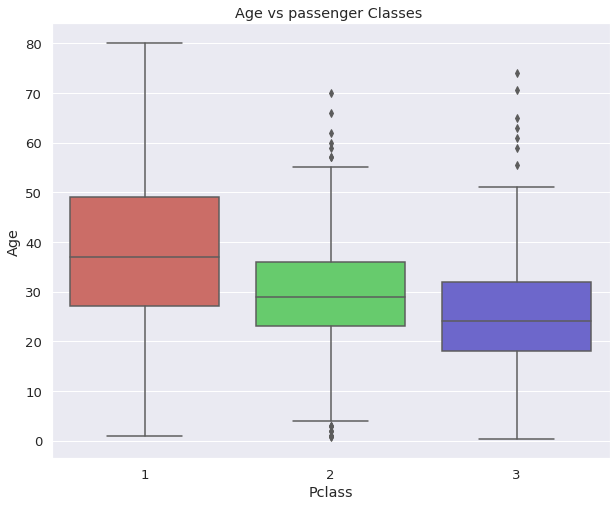

In [ ]:
# Dealing with the Missing Data
#We shall look at how passenger age is related to their passanger class on the boat.
# 
plt.figure(figsize=(10,8))
sb.boxplot(x='Pclass', y='Age', data=df, palette='hls')
plt.title("Age vs passenger Classes ")

In [ ]:
#Dealing with null values
# we shall checks the value of the Pclass and assigns an average age value  of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
#we shall apply the  function and check again for null value.
#
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Dealing with null values in the Embarked column
 #We shall use mode to fill the null values
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
#Cabin is a private room on a ship or boat
#We shall create a new colum that show whether a passanger was in the cabinor not 
#The replace the null values with 0 and 1 for the rows that are not null. 
df['cabin'] = [0 if str(x) == 'nan' else 1 for x in df['Cabin']]

#Then drop the former Cabin column and remail with cabin
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
#cross checking the null values again
df.isnull().sum().sum()

0

In [ ]:
df1= df.copy(deep=True)
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1


In [ ]:
#Dropping unnecessary columns
#df = df.drop(['PassengerId','Name','Ticket'], 1)
#df.head()

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
#Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


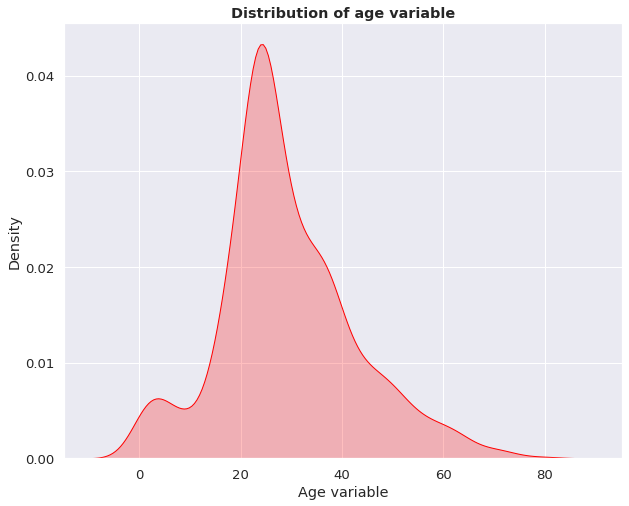

In [ ]:
#plot showing distributions of ages
f, ax = plt.subplots(figsize=(10,8))
x = df['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable",weight='bold')
plt.show()

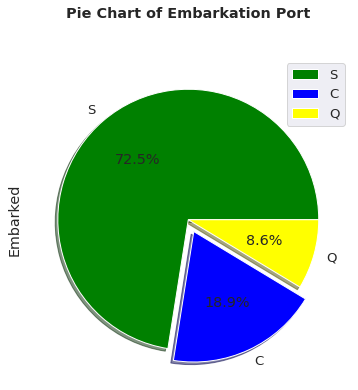

In [ ]:
#Pie charts
# Pie chart of the ports of embarkation
df['Embarked'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1,0), colors=['green',"blue","yellow"], autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Embarkation Port', y=1.1,weight="bold")
plt.show()

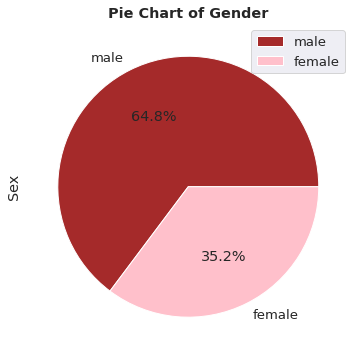

In [ ]:
# Pie chart of the gender distribution
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['brown','pink'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Gender', y=1, fontweight='bold')
plt.show()

## Data Preprocessing

In [ ]:
#Encoding using one hot encoding
df=pd.get_dummies(df,drop_first=True)

In [ ]:
#installing category encoder
#!pip install category_encoders
# import category encoders

#import category_encoders as ce

In [ ]:
# encode categorical variables with ordinal encoding

#encoder = ce.OrdinalEncoder(df.columns)
#df = encoder.fit_transform(df)
#df.head(2)

# Implementing the Solution

In [ ]:
#Splitting our dataset into target and features
X=df.drop(["Survived"],1)
y=df[["Survived"]]

#Survived column is our target variable as it tells us whether someone survived or not

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# We will perform feature scalling using standard scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#X_test.head(4)

In [ ]:
 X_test.shape


(179, 1580)

In [ ]:
X_train.shape

(712, 1580)

In [ ]:
#hypeparameter tuning
from sklearn.model_selection import GridSearchCV
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
#fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
# fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

#Making predictions

y_pred=classifier.predict(X_test)

# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12 98]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.11      0.20       110
           1       0.41      1.00      0.58        69

    accuracy                           0.45       179
   macro avg       0.71      0.55      0.39       179
weighted avg       0.77      0.45      0.35       179



In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
df2.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [ ]:
df2.shape

(418, 11)

In [ ]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Dealing with null values
# we shall checks the value of the Pclass and assigns an average age value  of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
#we shall apply the  function and check again for null value.
#
df2['Age'] = df2[['Age', 'Pclass']].apply(age_approx, axis=1)
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Cabin is a private room on a ship or boat
#We shall create a new colum that show whether a passanger was in the cabinor not 
#The replace the null values with 0 and 1 for the rows that are not null. 
df2['cabin'] = [0 if str(x) == 'nan' else 1 for x in df2['Cabin']]

#Then drop the former Cabin column and remail with cabin
df2.drop('Cabin', axis=1, inplace=True)

In [ ]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
cabin          0
dtype: int64

In [ ]:
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mode()[0])

In [ ]:
#df2=df2.dropna()
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
cabin          0
dtype: int64

In [ ]:
#Encoding using one hot encoding
df2=pd.get_dummies(df2,drop_first=True)

In [ ]:
# encode categorical variables with ordinal encoding

#encoder = ce.OrdinalEncoder(df2.columns)
#df2 = encoder.fit_transform(df2)
#df2.head(2)

In [ ]:
#Making predictions

y_pred=classifier.predict(df2)
y_pred
# The confusion_matrix and classification_report
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

ValueError: ignored

In [ ]:
output = pd.DataFrame({'PassengerId': df2.PassengerId,'Survived': y_pred})
output.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv('/content/submission.csv')